In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
power = pd.read_csv('household_power_consumption.txt',sep = ';',  parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='date_time')
power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
power.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [8]:
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
power = power.fillna(power.mean())

In [10]:
power.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


C:\Users\Taiwo kups\anaconda5\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Global_active_power')

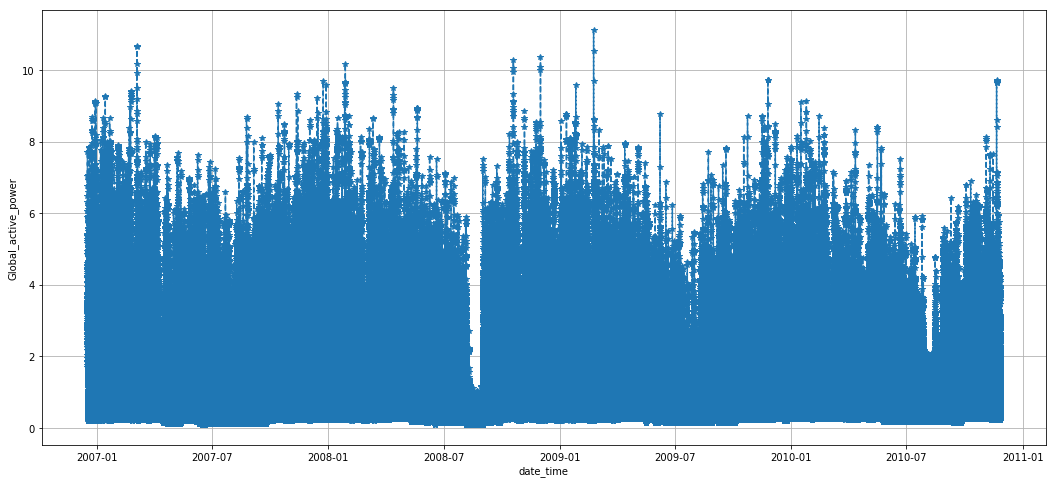

In [12]:
power = pd.read_csv('household_power_consumption.txt',sep = ';',  parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='date_time')
plt.figure(figsize=( 18 , 8 ))
plt.plot(power.index, power.Global_active_power, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'date_time' )
plt.ylabel( 'Global_active_power' ) 

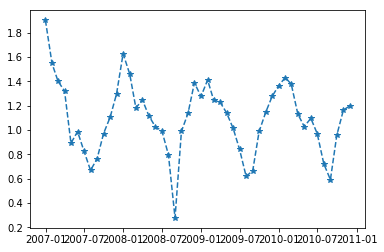

In [13]:
power_quarterly=power.resample('M').mean()
plt.plot(power_quarterly.index, power_quarterly.Global_active_power, '--'  , marker= '*' ,)

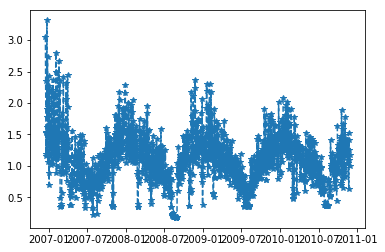

In [17]:
power_daily=power.resample('D').mean()
plt.plot(power_daily.index, power_daily.Global_active_power, '--'  , marker= '*' ,)

In [15]:
power['Global_active_power'].resample('M').mean().head()

date_time
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
Freq: M, Name: Global_active_power, dtype: float64

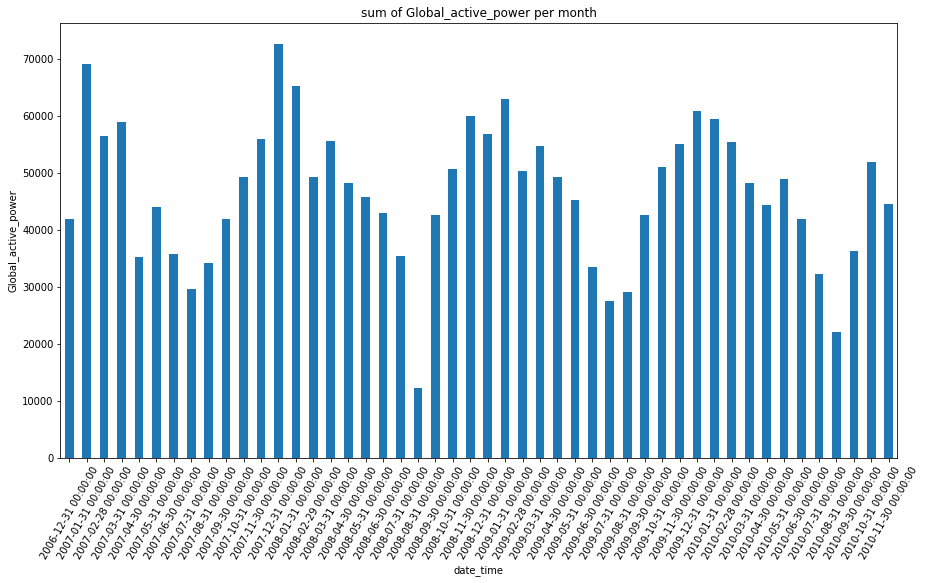

In [16]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
power['Global_active_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60) #sequence Values to use for the xticks
plt.ylabel('Global_active_power')
plt.title('sum of Global_active_power per month')
plt.show()

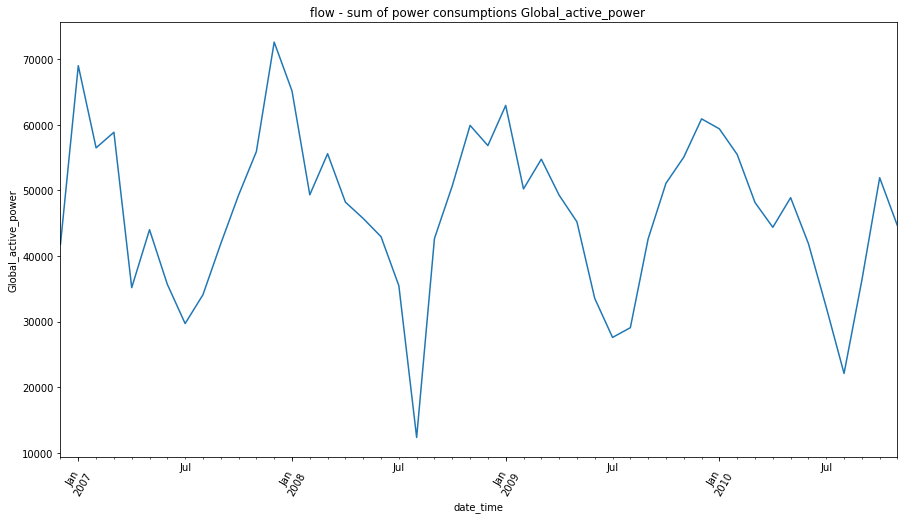

In [14]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
power['Global_active_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('flow - sum of power consumptions Global_active_power ')
plt.show()

In [15]:
power['Global_reactive_power'].resample('M').sum().head()

date_time
2006-12-31    2889.436
2007-01-31    5922.396
2007-02-28    4581.608
2007-03-31    5122.184
2007-04-30    4688.994
Freq: M, Name: Global_reactive_power, dtype: float64

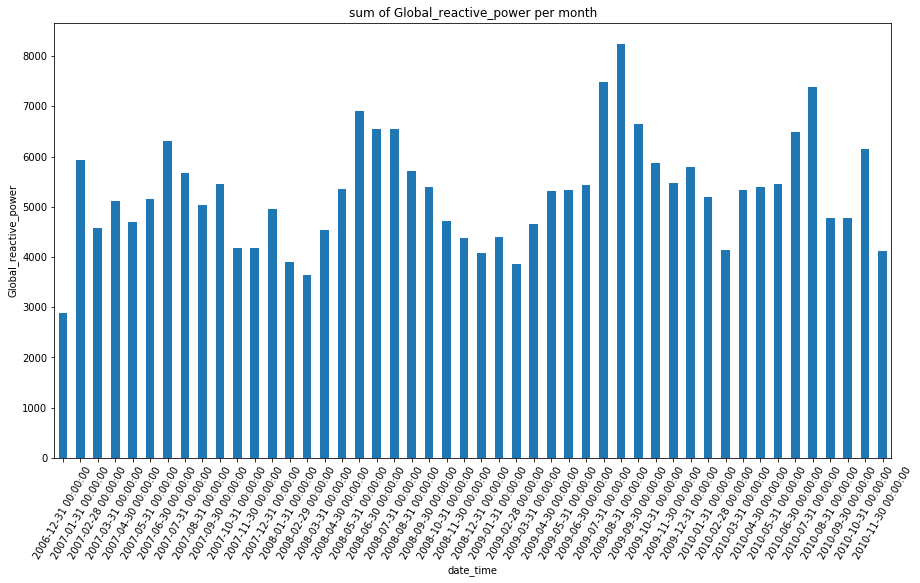

In [16]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
power['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60) #sequence Values to use for the xticks
plt.ylabel('Global_reactive_power')
plt.title('sum of Global_reactive_power per month')
plt.show()

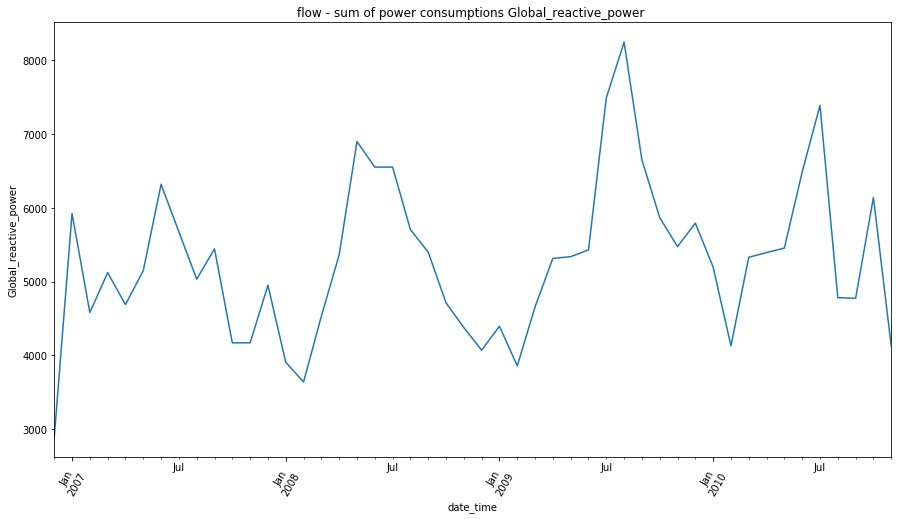

In [17]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
power['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_reactive_power')
plt.title('flow - sum of power consumptions Global_reactive_power ')
plt.show()

In [18]:
power['Sub_metering_1'].resample('M').sum().head()

date_time
2006-12-31    27460.0
2007-01-31    56433.0
2007-02-28    47584.0
2007-03-31    60769.0
2007-04-30    42078.0
Freq: M, Name: Sub_metering_1, dtype: float64

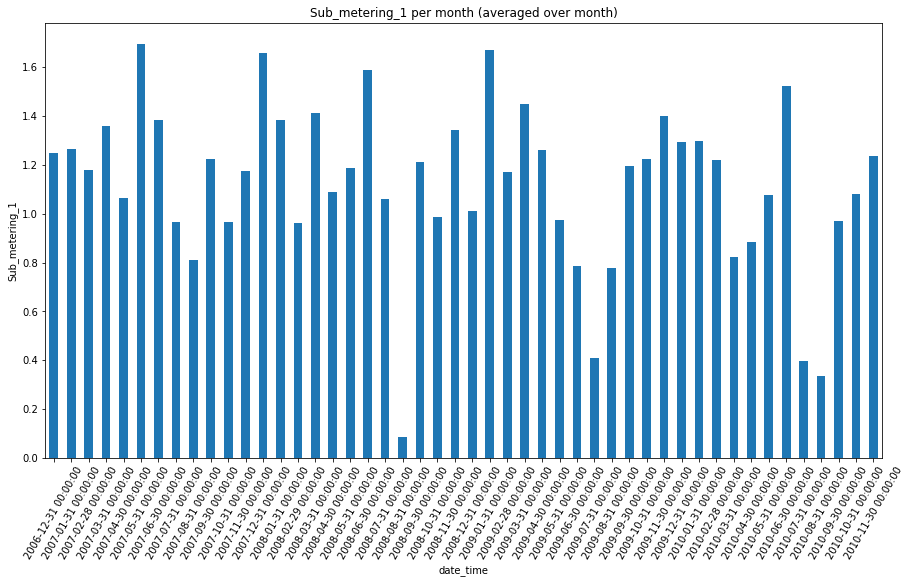

In [19]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per month (averaged over month)')
plt.show()

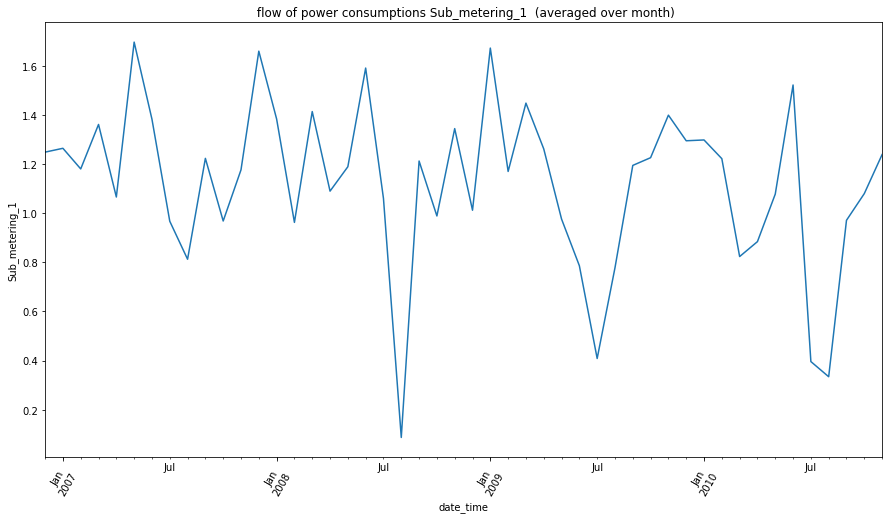

In [20]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_1'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title(' flow of power consumptions Sub_metering_1  (averaged over month)')
plt.show()

In [21]:
power['Sub_metering_2'].resample('M').sum().head()

date_time
2006-12-31     48712.0
2007-01-31     79274.0
2007-02-28     64604.0
2007-03-31    104762.0
2007-04-30     38417.0
Freq: M, Name: Sub_metering_2, dtype: float64

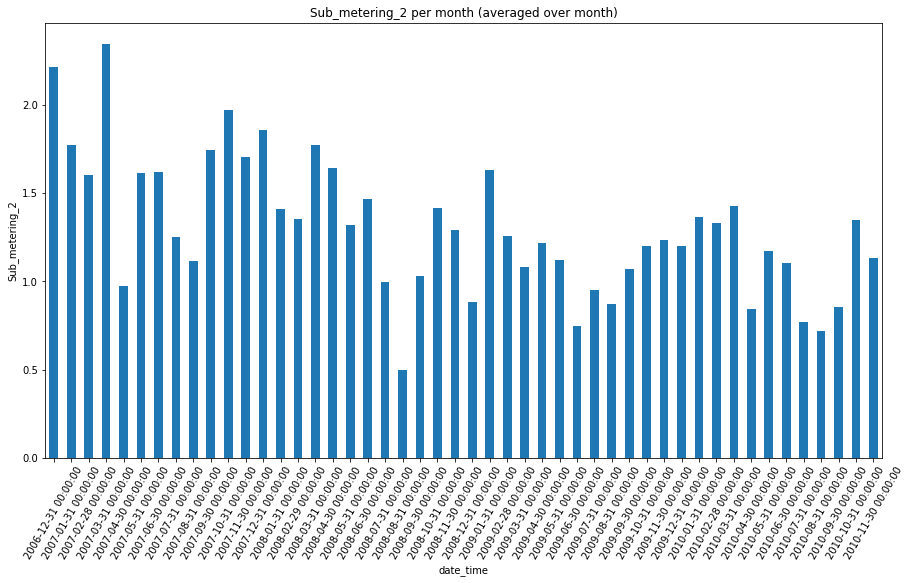

In [22]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_2'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 per month (averaged over month)')
plt.show()

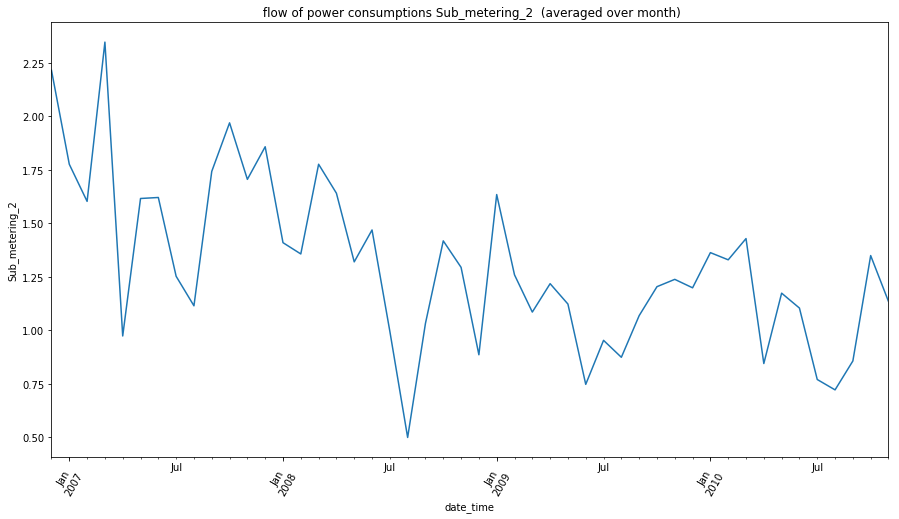

In [23]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_2'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title(' flow of power consumptions Sub_metering_2  (averaged over month)')
plt.show()

In [24]:
power['Sub_metering_3'].resample('M').sum().head()

date_time
2006-12-31    162951.0
2007-01-31    329578.0
2007-02-28    270274.0
2007-03-31    290361.0
2007-04-30    189503.0
Freq: M, Name: Sub_metering_3, dtype: float64

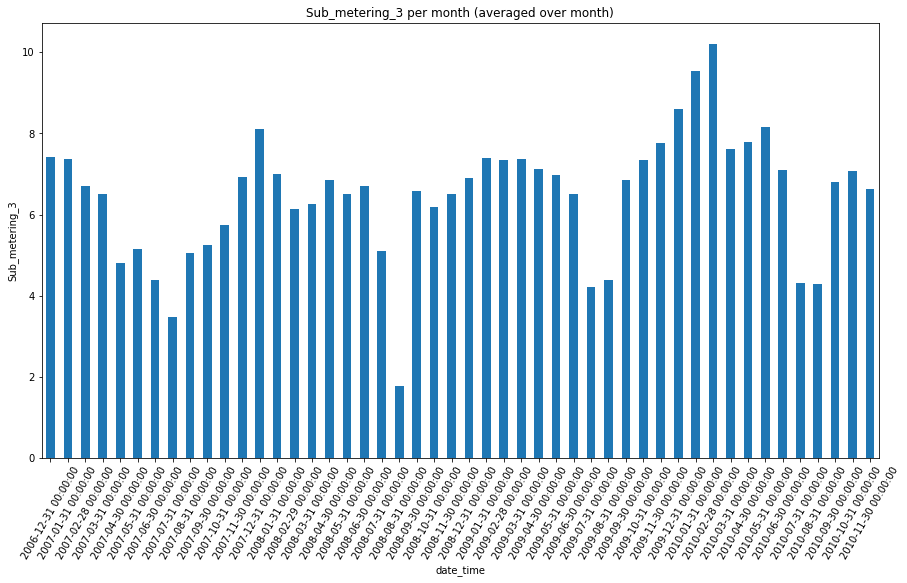

In [25]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_3'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 per month (averaged over month)')
plt.show()

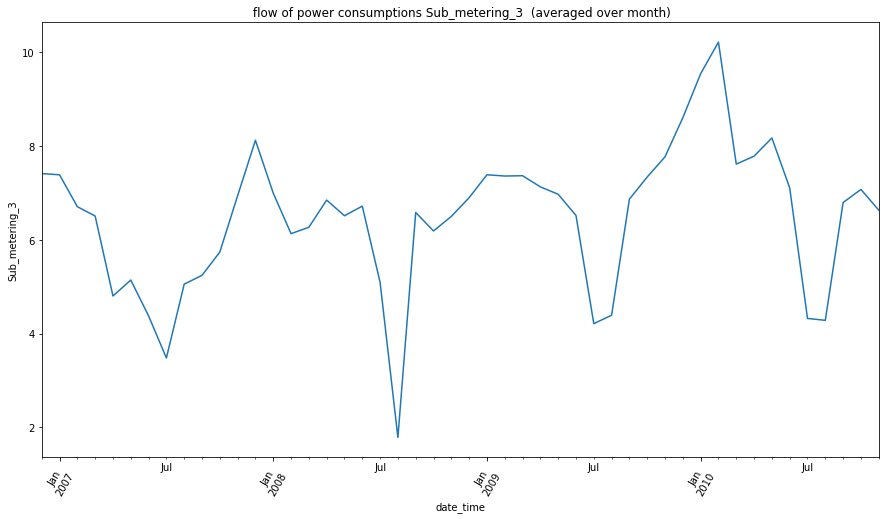

In [26]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
power['Sub_metering_3'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title(' flow of power consumptions Sub_metering_3  (averaged over month)')
plt.show()

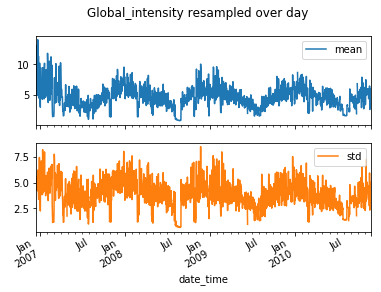

In [18]:
df_power = power.Global_intensity.resample('D').agg(['mean', 'std'])
df_power.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

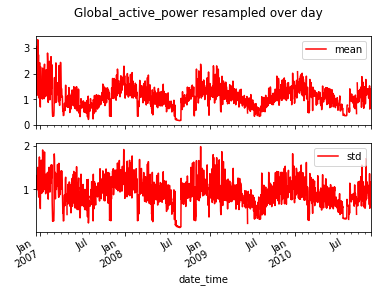

In [19]:
df2_power = power.Global_active_power.resample('D').agg(['mean', 'std'])
df2_power.plot(subplots = True, title='Global_active_power resampled over day', color='red')
plt.show()

In [20]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


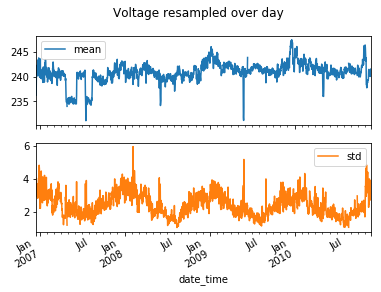

In [21]:
df3_power = power.Voltage.resample('D').agg(['mean', 'std'])
df3_power.plot(subplots = True, title='Voltage resampled over day')
plt.show()

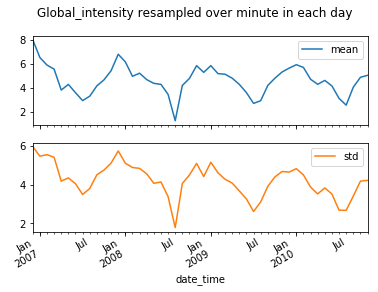

In [23]:
df4_power = power.Global_intensity.resample('MS').agg(['mean', 'std'])
df4_power.plot(subplots = True, title='Global_intensity resampled over minute in each day')
plt.show()

In [25]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data3 = 20 * randn(1000) + 100
data4 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data3, data4)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [26]:
from fbprophet import Prophet
power = pd.read_csv('household_power_consumption.txt')
power[ 'date_time' ]= pd.to_datetime(power[ 'date_time' ])
power = power.rename(columns={ "Global_reactive_power': 'add1', 'Voltage': 'add2','Global_intensity': 'add3', 'Sub_metering_1': 'add4','Sub_metering_2' : 'add5','Sub_metering_3':'add6'})
power.head()
model = Prophet()
model.fit(power) 


SyntaxError: EOL while scanning string literal (<ipython-input-26-582c43732256>, line 4)